Filas:  7
Columnas:  9


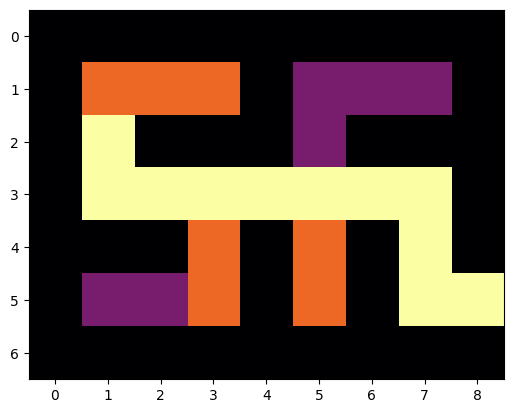

In [2]:
import matplotlib.pyplot as plt
import numpy as np
a = np.array([0,64,128,255]).reshape(2,2)
plt.imshow(a, cmap = "ocean")

#generamos la matriz bidimensional
matrix =    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 0, 1, 1, 1, 0],
            [0, 1, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 1, 1, 1, 0],
            [0, 0, 0, 1, 0, 1, 0, 1, 0],
            [0, 1, 1, 1, 0, 1, 0, 1, 3],
            [0, 0, 0, 0, 0, 0, 0, 0, 0]]

maze = np.array(matrix) #para que se grafique como array

plt.imshow(maze, cmap = "inferno")

#recorrido en profundidad dfs
def dfs(maze, s, t):
    #n, m = maze.shape
    def _dfs(u):
        if maze[u] == 1:
            maze[u] = 3
            if u == t:
                return True
            i, j = u
            nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
            for v in nbs:
                if maze[v] == 1:
                    if _dfs(v):
                        return True
            maze[u] = 2
        return False
    _dfs(s)
    
#hallar num de filas y columnas
n,m = maze.shape
print('Filas: ', n)
print('Columnas: ', m)

maze2 = maze.copy() #copia que va ser redibujada
dfs(maze2, (1,1), (n-2,m-2)) #arreglo-posIni-posFin

plt.imshow(maze2, cmap = "inferno")

#recorrido en anchura bfs
def bfs(maze, s, t):
    n, m = maze.shape
    path = np.full((n, m, 2), -1)
    q = [s]
    maze[s] = 2
    while q:
        u = q.pop(0)
        if u == t:
            break
        i, j = u
        nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
        for v in nbs:
            if maze[v] == 1:
                path[v] = u
                maze[v] = 2
                q.append(v)
    last = t
    while last != s:
        maze[last] = 3
        last = tuple(path[last])
        
maze3 = maze.copy() #copia que va ser redibujada
bfs(maze3, (1,1), (n-2,m-2)) #arreglo-posIni-posFin

plt.imshow(maze3, cmap = "inferno")

#algoritmo A-start
import heapq as hq
import numpy as np
import math

def h(a, b):
    # manhattan
    x0, y0 = a
    x1, y1 = b
    return abs(x0 - x1) + abs(y1 - y0)

def a_star(maze, s, t):
    n, m = maze.shape
    g = np.full((n, m), math.inf)
    f = np.full((n, m), math.inf)
    path = np.full((n, m, 2), -1)
    q = []
    g[s] = 0
    f[s] = h(s, t)
    hq.heappush(q, (f[s], s))
    while q:
        _, u = hq.heappop(q)
        if maze[u] != 1:
            continue
        maze[u] = 2
        if u == t:
            break
        i, j = u
        nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
        for v in nbs:
            if maze[v] == 1:
                if g[u] + 1 < g[v]:
                    path[v] = u
                    g[v] = g[u] + 1
                    f[v] = g[v] + h(v, t)
                    hq.heappush(q, (f[v], v))
    last = t
    while last != s:
        maze[last] = 3
        last = tuple(path[last])
        
maze4 = maze.copy() #copia que va ser redibujada
a_star(maze4, (1,1), (n-2,m-2)) #arreglo-posIni-posFin

plt.imshow(maze4, cmap = "inferno")